## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

## Import dataset

In [16]:
 toyota= pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


## EDA

In [17]:
 toyota.shape

(1436, 38)

In [18]:
toyota.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [19]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [20]:
toyota.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Preparation

In [21]:
toyota = toyota[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight","Price"]]

In [22]:
toyota

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025,7500
1432,72,19000,86,1300,3,5,69,1015,10845
1433,71,17016,86,1300,3,5,69,1015,8500
1434,70,16916,86,1300,3,5,69,1015,7250


In [23]:
toyota.shape

(1436, 9)

In [24]:
toyota.dtypes

Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
Price            int64
dtype: object

In [25]:
toyota[toyota.duplicated()]

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
113,8,13253,116,2000,5,5,234,1320,24950


In [26]:
toyota=toyota.drop_duplicates().reset_index(drop=True)
toyota

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1430,69,20544,86,1300,3,5,69,1025,7500
1431,72,19000,86,1300,3,5,69,1015,10845
1432,71,17016,86,1300,3,5,69,1015,8500
1433,70,16916,86,1300,3,5,69,1015,7250


In [27]:
toyota.shape

(1435, 9)

## Correlation Analysis

In [28]:
toyota.corr()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
Age_08_04,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484,-0.876273
KM,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969,-0.569420
HP,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143,0.314134
cc,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077,0.124375
Doors,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734,0.183604
Gears,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238,0.063831
Quarterly_Tax,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988,0.211508
Weight,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000,0.575869
Price,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869,1.000000


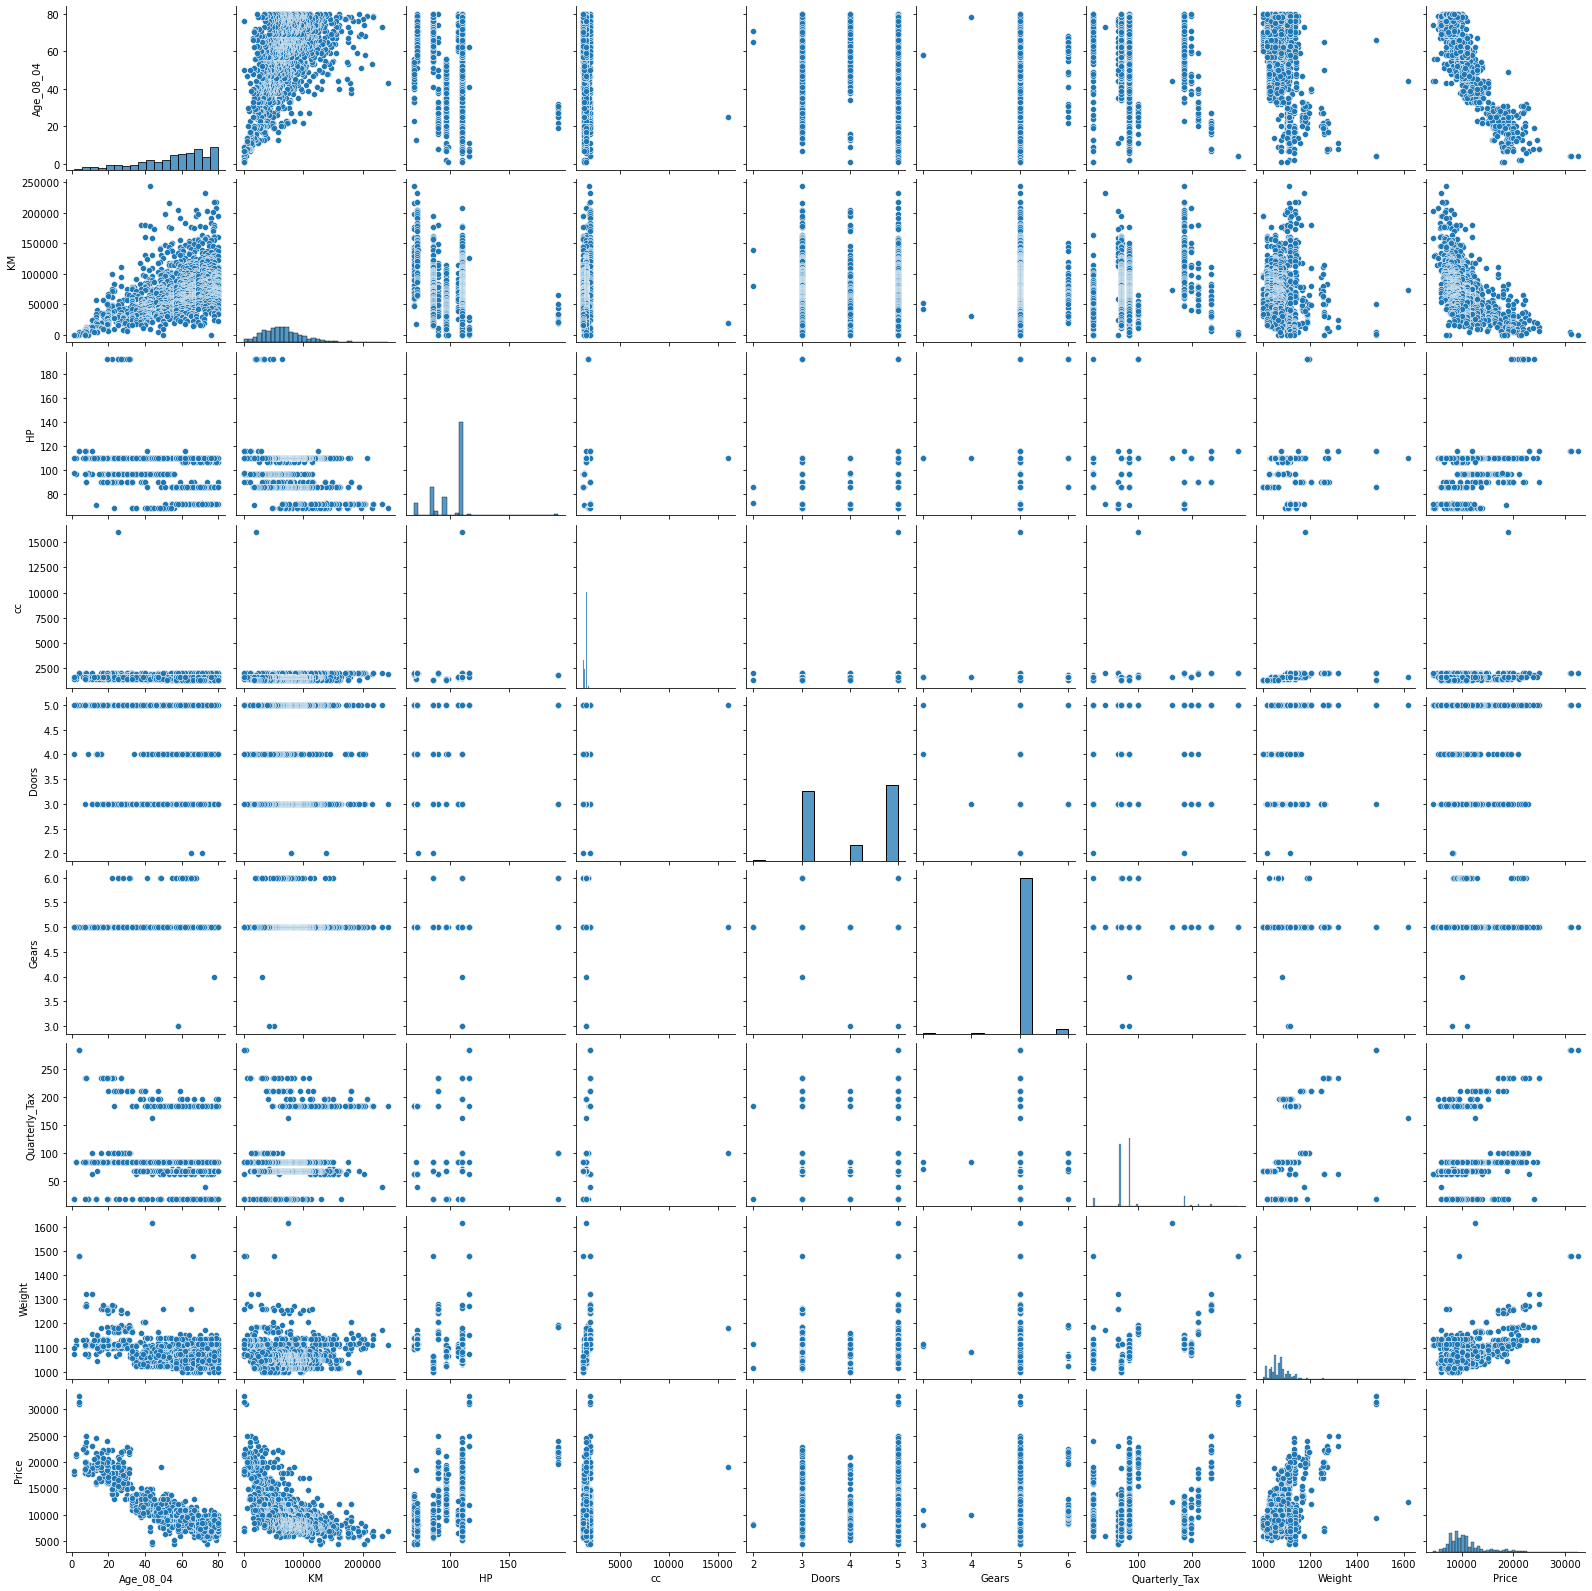

In [29]:
sns.pairplot(data=toyota)
plt.show()

<AxesSubplot:>

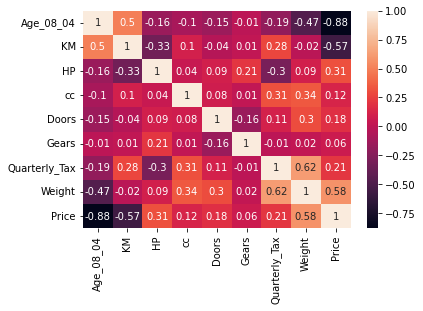

In [30]:
corr_matrix = toyota.corr().round(2)
sns.heatmap(data=corr_matrix,annot=True)

## Model Building

In [31]:
x = toyota.drop(labels='Price',axis=1)
y = toyota['Price']

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12)

## Model Training

In [33]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

## Model Testing

In [34]:
y_pred_train = linear_model.predict(x_train)
y_pred_test = linear_model.predict(x_test)

## Model Evaluation

In [35]:
from sklearn.metrics import mean_squared_error,r2_score

In [36]:
print('mse for train is ',mean_squared_error(y_train,y_pred_train))
print('mse for test is ',mean_squared_error(y_test,y_pred_test))
print('r2_score for train is ',r2_score(y_train,y_pred_train))
print('r2_score for test is ',r2_score(y_test,y_pred_test))

mse for train is  1780392.4460583543
mse for test is  1857151.907460019
r2_score for train is  0.8602405582295178
r2_score for test is  0.8682311109449775


## Model Optimization

In [37]:
methods = (('Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight'),
           ('Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax'),
           ('Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Weight'),
           ('Price ~ Age_08_04 + KM + HP + cc + Doors + Quarterly_Tax + Weight'),
           ('Price ~ Age_08_04 + KM + HP + cc + Gears + Quarterly_Tax + Weight'),
           ('Price ~ Age_08_04 + KM + HP + Doors + Gears + Quarterly_Tax + Weight'),
           ('Price ~ Age_08_04 + KM + cc + Doors + Gears + Quarterly_Tax + Weight'),
           ('Price ~ HP + cc + Doors + Gears + Quarterly_Tax + Weight'),
           ('Price ~ Age_08_04'),('Price~KM'),('Price ~ HP'),('Price ~ cc'),('Price ~ Doors'),
           ('Price ~ Gears'),('Price ~ Quarterly_Tax'),('Price ~ Weight'))

In [38]:
for model in methods:
    models=smf.ols(model,data=toyota).fit()
    print(model)
    params=models.params
    print(params)
    pvalue=models.pvalues
    pvalue_data=pvalue.to_frame()
    pvalue_data.reset_index(inplace=True)
    pvalue_data.rename({'index':'features'},axis=1)
    print('')
    print('pvalue is:')
    print(pvalue_data)
    for i in range(len(pvalue_data)):
        if i!=0:
            if pvalue_data.iloc[i,1]>0.05:
                print('')
                print('{} is an insignificant feature, since pvalue {} is greater than 0.05'
                  .format(pvalue_data.iloc[i,0],pvalue_data.iloc[i,1]))
    print('')
    print('aic value is: ',models.aic)
    print('rsqaure value is: ',models.rsquared)
    print('_____________________________________________________________________________________________________')

Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight
Intercept       -5472.540368
Age_08_04        -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

pvalue is:
           index              0
0      Intercept   1.113392e-04
1      Age_08_04  1.879217e-288
2             KM   1.994713e-56
3             HP   5.211155e-28
4             cc   1.882393e-01
5          Doors   9.816443e-01
6          Gears   2.452430e-03
7  Quarterly_Tax   3.290363e-03
8         Weight   1.031118e-51

cc is an insignificant feature, since pvalue 0.18823933719299102 is greater than 0.05

Doors is an insignificant feature, since pvalue 0.9816443126768644 is greater than 0.05

aic value is:  24750.407207346932
rsqaure value is:  0.8625200256947
________________________________________________________________________


pvalue is:
       index             0
0  Intercept  1.031004e-06
1         HP  3.123394e-34

aic value is:  27434.75510656108
rsqaure value is:  0.09868025156106075
_____________________________________________________________________________________________________
Price ~ cc
Intercept    9053.536789
cc              1.057605
dtype: float64

pvalue is:
       index              0
0  Intercept  7.236022e-114
1         cc   2.292856e-06

aic value is:  27561.473196759664
rsqaure value is:  0.01546901962024061
_____________________________________________________________________________________________________
Price ~ Doors
Intercept    7916.145233
Doors         695.497769
dtype: float64

pvalue is:
       index             0
0  Intercept  8.976407e-75
1      Doors  2.404166e-12

aic value is:  27534.636141744002
rsqaure value is:  0.03371039712338908
_____________________________________________________________________________________________________
Price ~ Gears
Intercept    4580.9347

## Variance Influence Factor

In [39]:
req_age =smf.ols('Age_08_04 ~ KM +HP + cc + Doors + Gears + Quarterly_Tax + Weight',data=toyota).fit().rsquared
vif_age=1/(1-req_age)

req_cc =smf.ols('cc ~ Age_08_04 + KM +HP + Doors + Gears + Quarterly_Tax + Weight',data=toyota).fit().rsquared
vif_cc=1/(1-req_cc)

req_km =smf.ols('KM ~ Age_08_04 + HP + cc + Doors + Gears + Quarterly_Tax + Weight',data=toyota).fit().rsquared
vif_km=1/(1-req_km)

req_hp =smf.ols('HP ~ Age_08_04 + KM + cc + Doors + Gears + Quarterly_Tax + Weight',data=toyota).fit().rsquared
vif_hp=1/(1-req_hp)

req_door =smf.ols('Doors ~ Age_08_04 + KM +HP + cc + Gears + Quarterly_Tax + Weight',data=toyota).fit().rsquared
vif_door=1/(1-req_door)

req_quarterly=smf.ols('Quarterly_Tax ~ Age_08_04 + KM +HP + cc + Doors + Gears + Weight',data=toyota).fit().rsquared
vif_quarterly=1/(1-req_quarterly)

req_wt=smf.ols('Weight ~ Age_08_04 + KM +HP + cc + Doors + Gears + Quarterly_Tax ',data=toyota).fit().rsquared
vif_wt=1/(1-req_wt)

req_gear=smf.ols('Gears ~ Age_08_04 + KM +HP + cc + Doors + Quarterly_Tax + Weight ',data=toyota).fit().rsquared
vif_gear=1/(1-req_gear)

In [40]:
vif_table=pd.DataFrame({'variables':['age','km','hp','cc','door','gears','quaterly','weight'],
              'vif':[vif_age,vif_km,vif_hp,vif_cc,vif_door,vif_gear,vif_quarterly,vif_wt]})
vif_table

,variables,vif
0,age,1.876236
1,km,1.757178
2,hp,1.419180
3,cc,1.163470
4,door,1.155890
5,gears,1.098843
6,quaterly,2.295375
7,weight,2.487180


## Detecting Outliers

### Cook's distance

In [41]:
cooks_model = smf.ols('Price ~ Age_08_04 + KM +HP + cc + Doors + Gears + Quarterly_Tax + Weight',data=toyota).fit()

In [43]:
model_influence=cooks_model.get_influence()
c,_=model_influence.cooks_distance

<StemContainer object of 3 artists>

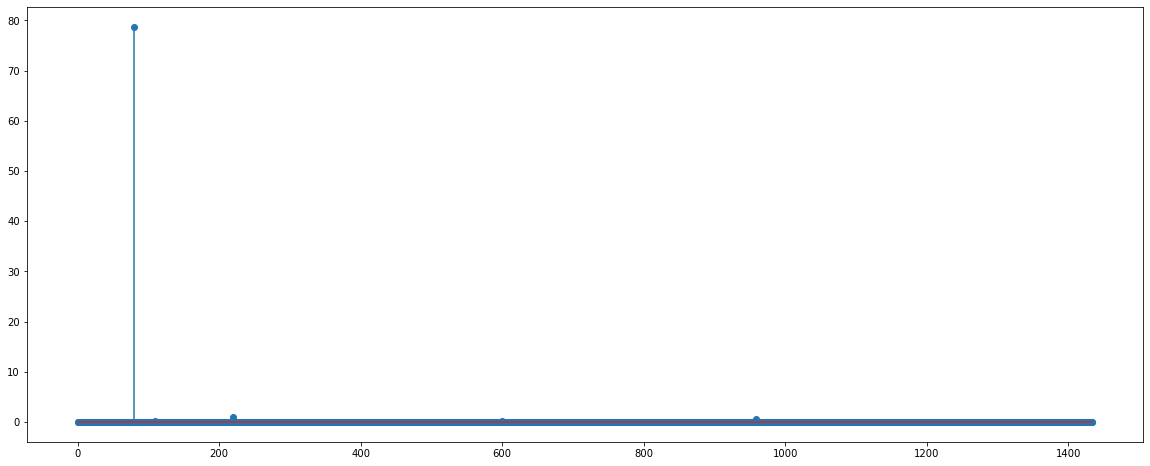

In [44]:
fig_cook=plt.figure(figsize=(20,8))
plt.stem(np.arange(len(toyota)),np.round(c,3))

In [45]:
(np.argmax(c),np.max(c))

(80, 78.7295058224916)

## High Influence plot

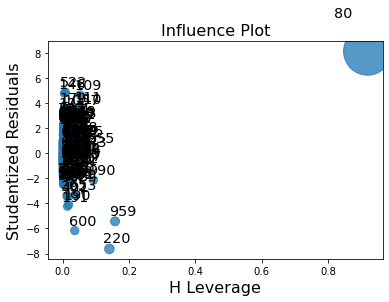

In [47]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(cooks_model)
plt.show()

In [48]:
k=toyota.shape[1]
n=toyota.shape[0]
leverage_cutoff=3*((k +1)/n)
leverage_cutoff

0.020905923344947737

In [49]:
toyota_new=toyota
toyota_new[toyota_new.index.isin([80])]

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
80,25,20019,110,16000,5,5,100,1180,18950


In [50]:
toyota_new=toyota_new.drop(toyota_new.index[80]).reset_index()

In [51]:
toyota_new=toyota_new.drop(['index'],axis=1)
toyota_new

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1429,69,20544,86,1300,3,5,69,1025,7500
1430,72,19000,86,1300,3,5,69,1015,10845
1431,71,17016,86,1300,3,5,69,1015,8500
1432,70,16916,86,1300,3,5,69,1015,7250


## Final model

In [52]:
model_final=smf.ols('Price ~ Age_08_04 + KM +HP + cc + Doors + Gears + Quarterly_Tax + Weight',data=toyota_new).fit()

In [53]:
model_final.rsquared,model_final.aic

(0.8681163912634053, 24669.363894157)

In [54]:
model_final_door=smf.ols('Price ~ Age_08_04 + KM +HP + cc + Gears + Quarterly_Tax + Weight',data=toyota_new).fit()

In [55]:
model_final_door.rsquared,model_final_door.aic

(0.8680741306155819, 24667.823330034196)